In [1]:
import pypsa
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

import cartopy.crs as ccrs

import pandas as pd
import geopandas as gpd

c:\Users\jume.eco\AppData\Local\miniconda3\envs\esm3\Lib\site-packages\pypsa\networkclustering.py:16: UserWarning:

The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 



In [2]:
""" 
plots for theory part:
- map with H2 demand from vom Scheidt et al.
- map with installed RES and potentials based on pypsa
"""

' \nplots for theory part:\n- map with H2 demand from vom Scheidt et al.\n- map with installed RES and potentials based on pypsa\n'

In [3]:
# file paths
file_demand ="input/Hydrogen_Demand_All.csv"
file_nuts = "input/NUTS_RG_10M_2021_4326.geojson"
#file_n = "input/2019_TRM25_Ep25_Load490/elec_s_156_ec_lv1.0_Ep-1H.nc"

In [4]:
# read files
df = pd.read_csv(file_demand, index_col=0, delimiter=",") 
nuts = gpd.read_file(file_nuts)
#q = pypsa.Network(file_n)

In [5]:
# prepare gdf with H2 demand data (Lon and Lat are given as EPSG:4326)
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)
gdf = gdf.to_crs('epsg:3035')

In [6]:
# prepare nuts gdf
nuts = nuts.set_index('id')
nuts1DE = nuts.query("LEVL_CODE == 1 & CNTR_CODE == 'DE'")
nuts1DE = nuts1DE.to_crs(3035)

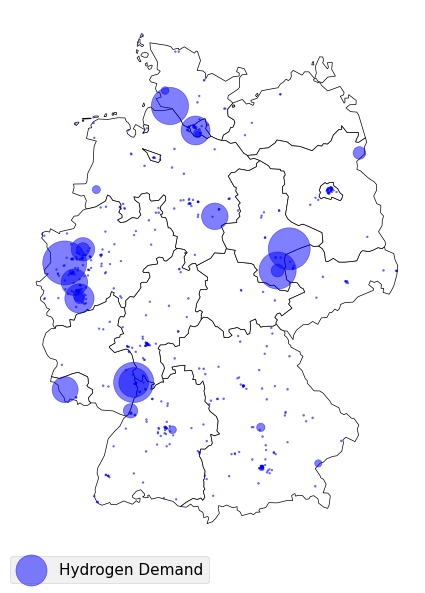

In [7]:
fig = plt.figure(figsize=(7,7))

ax = plt.axes(projection=ccrs.epsg(3035))

ax.set_frame_on(False) # Removes the frame
#ax.set_extent([5, 19, 47, 55])

nuts1DE.plot(
    ax=ax,
    edgecolor='black',
    facecolor='white',
)

gdf.plot(
    ax=ax,
    marker="o",
    color="blue",
    alpha=0.5,
    markersize= gdf["Demand [TWh/a]"] / gdf["Demand [TWh/a]"].max() * 1000,
    legend=False,
    label="Hydrogen Demand"
)

fig.legend(fontsize=11, bbox_to_anchor=(0.5,0), bbox_transform=ax.transAxes)


In [8]:
# save figure
#fig.savefig("plots/h2_demand.png")


In [9]:
file_red ="input/historical_redispatch.xlsx"

In [10]:
df = pd.read_excel(file_red, skiprows=[1]) 

In [12]:
df["Volume (GWh)"] = df["Volume (GWh)"] / 1e3
df

,Bericht,Year,Volume (GWh),Costs (Mio EUR),Page,Kommentar
0,report 2018,2017,20.439,901.0,124,Redispatch i.S.d. §13 Abs. 1 EnWG
1,report 2019,2018,15.529,803.0,139,Redispatch i.S.d. §13 Abs. 1 EnWG
2,report 2020,2019,13.521,569.5,135,Redispatch i.S.d. §13 Abs. 1 EnWG
3,report 2021,2020,16.795,637.4,147,Redispatch i.S.d. §13 Abs. 1 EnWG
4,report 2022,2021,21.546,1478.6,162,Redispatch i.S.d. §13 Abs. 1 EnWG


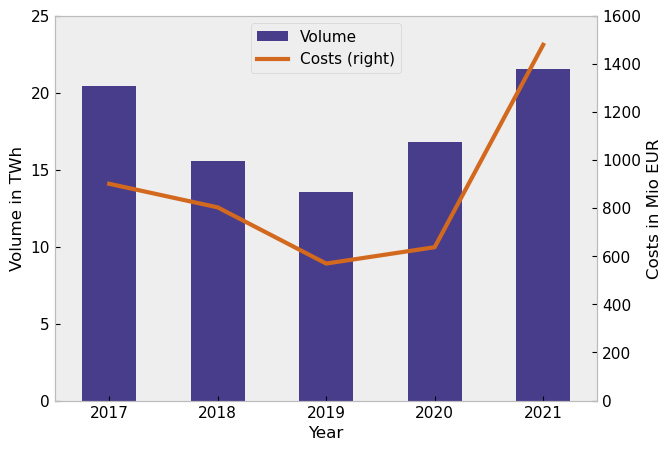

In [14]:
fig, ax = plt.subplots(figsize=(7,5))

fontsize=11

ax = df.plot(x = 'Year', y="Volume (GWh)", ax = ax, color="darkslateblue", kind='bar', ylabel="Volume in TWh", label="Volume", fontsize=fontsize) 
ax2 = df["Costs (Mio EUR)"].plot(x = ax.get_xticks(), ax = ax, secondary_y = True, color="chocolate", kind='line', ylabel="Costs in Mio EUR", label="Costs", linewidth=3, fontsize=fontsize) 
ax.set_ylim(0,25)
ax2.set_ylim(0,1600)

ax.grid(False)
ax.legend().set_visible(False)

fig.legend(loc="upper center", fontsize=fontsize, bbox_to_anchor=(0.5,1), bbox_transform=ax.transAxes)

In [15]:
fig.savefig("plots/redispatch_development_DE.png",transparent=True)